# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

## Part 2: Implement SVD for Dimensionality Reduction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


In [ ]:
def apply_svd_custom(X_train, X_test, n_components):
    # Compute the mean of the training data
    X_mean = np.mean(X_train, axis=0)

    # Center the training and test data
    X_train_centered = X_train - X_mean
    X_test_centered = X_test - X_mean

    # Compute the covariance matrix
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / (X_train_centered.shape[0] - 1)

    # Perform SVD on the covariance matrix
    U, S, Vt = np.linalg.svd(covariance_matrix)

    # Select the top n_components singular vectors
    U_reduced = U[:, :n_components]

    # Project the centered data onto the reduced singular vectors
    X_train_svd = np.dot(X_train_centered, U_reduced)
    X_test_svd = np.dot(X_test_centered, U_reduced)

    return X_train_svd, X_test_svd, U_reduced, S

## Part 3: Train Logistic Regression and Measure Performance

In [ ]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [ ]:
svd_components = [784, 100, 50, 30, 10, 5]

# Store the results
results = []
singular_vectors_list = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"\nApplying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, U_reduced, S = apply_svd_custom(X_train, X_test, n_components)

    # Store the top singular vectors for visualization
    if n_components >= 5:
        singular_vectors_list.append(U_reduced[:, :5])

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

Training models with different levels of SVD preprocessing...

Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9207, Training time: 553.7586 seconds

Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 43.9178 seconds

Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9080, Training time: 13.1746 seconds

Applying custom SVD with 30 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 30, Accuracy: 0.8922, Training time: 6.8537 seconds

Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8035, Training time: 1.0877 seconds

Applying custom SVD with 5 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 5, Accuracy: 0.6796, Training time: 0.6820 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


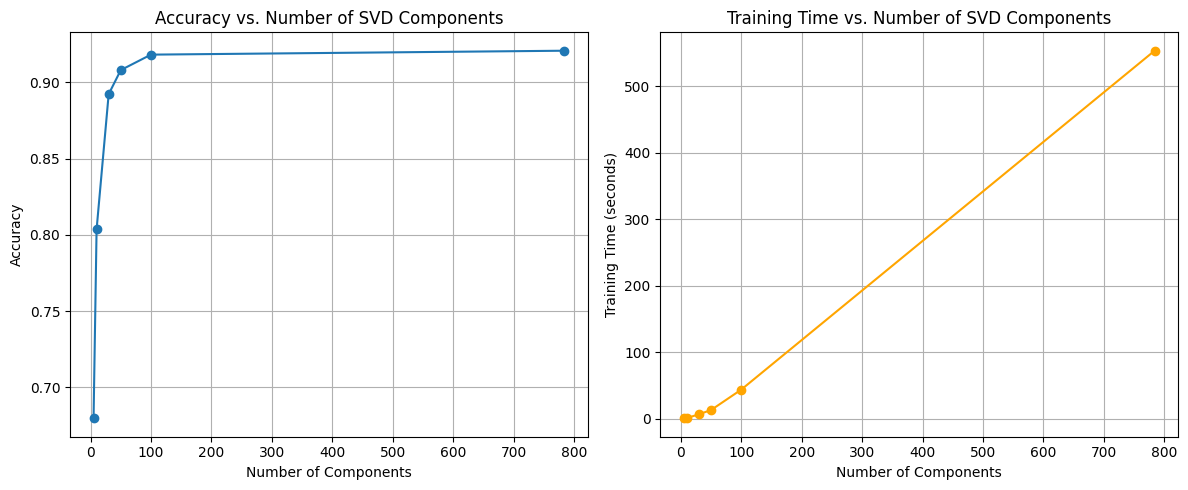

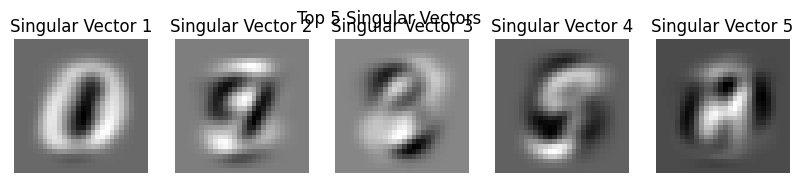

In [ ]:
# Extract data for plotting
components = [result['n_components'] for result in results]
accuracies = [result['accuracy'] for result in results]
training_times = [result['training_time'] for result in results]

# Plot Accuracy vs. Number of Components
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Training Time vs. Number of Components
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o', color='orange')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualize the top 5 singular vectors for the highest number of components
if singular_vectors_list:
    # Get the singular vectors from the first entry (largest n_components)
    top_singular_vectors = singular_vectors_list[0]

    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(top_singular_vectors[:, i].reshape(28, 28), cmap='gray')
        plt.title(f'Singular Vector {i+1}')
        plt.axis('off')
    plt.suptitle('Top 5 Singular Vectors')
    plt.show()

## Part 6: Analyze / Conclusion

YOUR ANSWER:

In [ ]:
print("In summary, applying SVD to reduce the dimensionality of the MNIST dataset before training a logistic regression model revealed that using around 50 components offers the best balance between accuracy and efficiency. While the full 784 components provide the highest accuracy, reducing the number to 50 significantly decreases training time with only a minimal drop in performance. Visualizing the top singular vectors showed they capture the essential features of the digits, meaning most important information is retained even after reduction. Therefore, selecting about 50 SVD components seems optimal for achieving both high accuracy and faster training on this dataset.")


In summary, applying SVD to reduce the dimensionality of the MNIST dataset before training a logistic regression model revealed that using around 50 components offers the best balance between accuracy and efficiency. While the full 784 components provide the highest accuracy, reducing the number to 50 significantly decreases training time with only a minimal drop in performance. Visualizing the top singular vectors showed they capture the essential features of the digits, meaning most important information is retained even after reduction. Therefore, selecting about 50 SVD components seems optimal for achieving both high accuracy and faster training on this dataset.
